## Fetch Data Analyst Take Home
Three unstructured CSV files are provided along with the take home instructions. They contain data on users, transactions, and products. 
I will be using Python in this jupyter notebook for the exercises. Utilizing pandas/sqlite3 to load/transform the data and matplotlib/seaborn to visualize it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from datetime import datetime

# set seaborn style
sns.set_theme()
# sns.set(font_scale=1.3)

In [2]:
# Read CSV files
users = pd.read_csv("users.csv")
transactions = pd.read_csv("transactions.csv")
products = pd.read_csv("products.csv")

# Print dataframe shapes
print("Users shape:", users.shape)
print("Transactions shape:", transactions.shape)
print("Products shape:", products.shape)

Users shape: (100000, 6)
Transactions shape: (50000, 8)
Products shape: (845552, 7)


## Exercise 1: Explore the Data
Are there any data quality issues present?
Are there any fields that are challenging to understand?

In [3]:
# Lets print the column names
print(users.columns)
print(transactions.columns)
print(products.columns)

Index(['ID', 'CREATED_DATE', 'BIRTH_DATE', 'STATE', 'LANGUAGE', 'GENDER'], dtype='object')
Index(['RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME', 'USER_ID',
       'BARCODE', 'FINAL_QUANTITY', 'FINAL_SALE'],
      dtype='object')
Index(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER',
       'BRAND', 'BARCODE'],
      dtype='object')


In [4]:
# Check for duplicate rows in user data
user_duplicate_rows = users.duplicated().sum()
print(f"Number of duplicate rows: {user_duplicate_rows}")

# Check for duplicate ID in user data
user_duplicate_ids = users.duplicated(subset=['ID']).sum()
print(f"Number of duplicate IDs: {user_duplicate_ids}")

Number of duplicate rows: 0
Number of duplicate IDs: 0


In [5]:
# Check unique state values
print("Unique states:", users["STATE"].unique())

Unique states: ['CA' 'PA' 'FL' 'NC' 'NY' 'IN' nan 'OH' 'TX' 'NM' 'PR' 'CO' 'AZ' 'RI' 'MO'
 'NJ' 'MA' 'TN' 'LA' 'NH' 'WI' 'IA' 'GA' 'VA' 'DC' 'KY' 'SC' 'MN' 'WV'
 'DE' 'MI' 'IL' 'MS' 'WA' 'KS' 'CT' 'OR' 'UT' 'MD' 'OK' 'NE' 'NV' 'AL'
 'AK' 'AR' 'HI' 'ME' 'ND' 'ID' 'WY' 'MT' 'SD' 'VT']


In [6]:
# Check unique language values
print("Unique languages:", users["LANGUAGE"].unique())

Unique languages: ['es-419' 'en' nan]


In [7]:
# Check unique gender values
print("Unique genders:", users["GENDER"].unique())

Unique genders: ['female' nan 'male' 'non_binary' 'transgender' 'prefer_not_to_say'
 'not_listed' 'Non-Binary' 'unknown' 'not_specified'
 "My gender isn't listed" 'Prefer not to say']


ID               0.000
CREATED_DATE     0.000
BIRTH_DATE       3.675
STATE            4.812
GENDER           5.892
LANGUAGE        30.508
dtype: float64


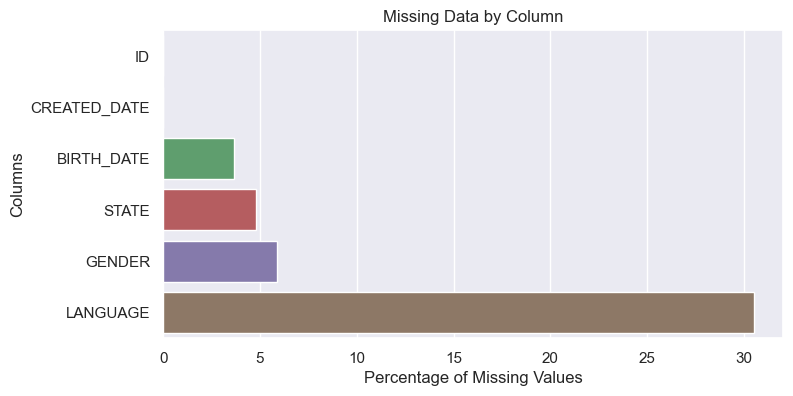

In [68]:
# Calculate the percentage of missing values for each column
missing_values = (users.isnull().sum() / len(users)) * 100

# Sort values for better visualization
missing_values = missing_values.sort_values()
print(missing_values)

# Plot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(y=missing_values.index, x=missing_values.values)

# Formatting
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Missing Data by Column")
# plt.xticks(rotation=45)  # Rotate labels for better readability

plt.show()

In [9]:
# Check for duplicate rows in transaction data
transaction_duplicate_rows = transactions.duplicated().sum()
print(f"Number of duplicate rows: {transaction_duplicate_rows}")

# Check for duplicate (RECEIPT_ID, USER_ID, BARCODE) in transaction data
transaction_duplicate_ids = transactions.duplicated(subset=["RECEIPT_ID", "USER_ID", "BARCODE"]).sum()
print(f"Number of duplicate IDs: {transaction_duplicate_ids}")

Number of duplicate rows: 171
Number of duplicate IDs: 25205


In [10]:
transactions.sort_values(by=["RECEIPT_ID", "USER_ID", "BARCODE"]).head(10)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
41567,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,1.54
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
39291,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,1.00,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
25928,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,2.54
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
41475,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,1.00,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
43233,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,5.29


In [11]:
# Check unique store name values
print("Unique store names:", transactions["STORE_NAME"].unique().shape[0])

Unique store names: 954


In [12]:
# Check unique quantity values
print("Unique quantities:", transactions["FINAL_QUANTITY"].unique())

Unique quantities: ['1.00' 'zero' '2.00' '3.00' '4.00' '4.55' '2.83' '2.34' '0.46' '7.00'
 '18.00' '12.00' '5.00' '2.17' '0.23' '8.00' '1.35' '0.09' '2.58' '1.47'
 '16.00' '0.62' '1.24' '1.40' '0.51' '0.53' '1.69' '6.00' '2.39' '2.60'
 '10.00' '0.86' '1.54' '1.88' '2.93' '1.28' '0.65' '2.89' '1.44' '2.75'
 '1.81' '276.00' '0.87' '2.10' '3.33' '2.54' '2.20' '1.93' '1.34' '1.13'
 '2.19' '0.83' '2.61' '0.28' '1.50' '0.97' '0.24' '1.18' '6.22' '1.22'
 '1.23' '2.57' '1.07' '2.11' '0.48' '9.00' '3.11' '1.08' '5.53' '1.89'
 '0.01' '2.18' '1.99' '0.04' '2.25' '1.37' '3.02' '0.35' '0.99' '1.80'
 '3.24' '0.94' '2.04' '3.69' '0.70' '2.52' '2.27']


RECEIPT_ID        0.000
PURCHASE_DATE     0.000
SCAN_DATE         0.000
STORE_NAME        0.000
USER_ID           0.000
FINAL_QUANTITY    0.000
FINAL_SALE        0.000
BARCODE           5.762
dtype: float64


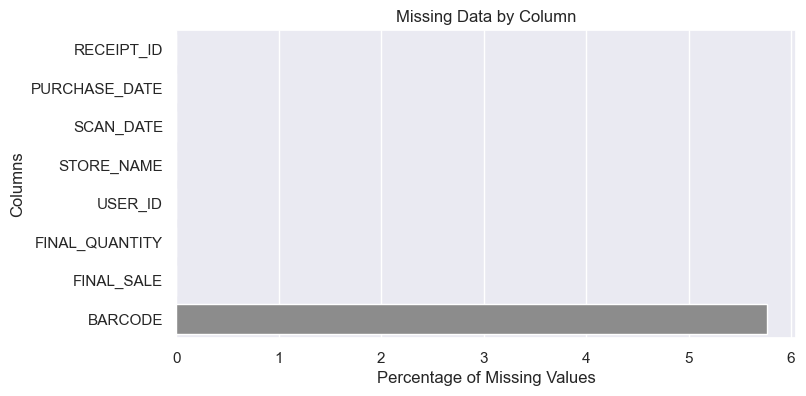

In [69]:
# Calculate the percentage of missing values for each column
missing_values = (transactions.isnull().sum() / len(users)) * 100

# Sort values for better visualization
missing_values = missing_values.sort_values()
print(missing_values)
# Plot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(y=missing_values.index, x=missing_values.values)

# Formatting
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Missing Data by Column")
# plt.xticks(rotation=45)

plt.show()

In [14]:
# Check for duplicate rows in product data
product_duplicate_rows = products.duplicated().sum()
print(f"Number of duplicate rows: {product_duplicate_rows}")

# Check for duplicate BARCODE in product data
product_duplicate_bars = products.duplicated(subset=['BARCODE']).sum()
print(f"Number of duplicate IDs: {product_duplicate_bars}")

Number of duplicate rows: 215
Number of duplicate IDs: 4209


In [15]:
# Check unique category 1 values
print("Unique Category 1:", products["CATEGORY_1"].unique())

Unique Category 1: ['Health & Wellness' 'Snacks' 'Beverages' 'Pantry' 'Alcohol'
 'Apparel & Accessories' 'Restaurant' 'Needs Review' 'Dairy'
 'Home & Garden' nan 'Household Supplies' 'Meat & Seafood' 'Deli & Bakery'
 'Sporting Goods' 'Produce' 'Office & School' 'Frozen'
 'Arts & Entertainment' 'Animals & Pet Supplies' 'Electronics' 'Beauty'
 'Toys & Games' 'Mature' 'Vehicles & Parts' 'Baby & Toddler'
 'Luggage & Bags' 'Media']


In [16]:
# Check unique category 2 values
print("Unique Category 2:", products["CATEGORY_2"].unique().shape[0])

Unique Category 2: 122


In [17]:
# Check unique category 3 values
print("Unique Category 3:", products["CATEGORY_3"].unique().shape[0])

Unique Category 3: 345


In [18]:
# Check unique category 4 values
print("Unique Category 4:", products["CATEGORY_4"].unique().shape[0])

Unique Category 4: 128


In [19]:
# Check unique manufacturer values
print("Unique Manufacturers:", products["MANUFACTURER"].unique().shape[0])

Unique Manufacturers: 4355


In [20]:
# Check unique brand values
print("Unique Brands:", products["BRAND"].unique().shape[0])

Unique Brands: 8123


CATEGORY_1       0.013128
CATEGORY_2       0.168411
BARCODE          0.476020
CATEGORY_3       7.162895
BRAND           26.783923
MANUFACTURER    26.784160
CATEGORY_4      92.021898
dtype: float64


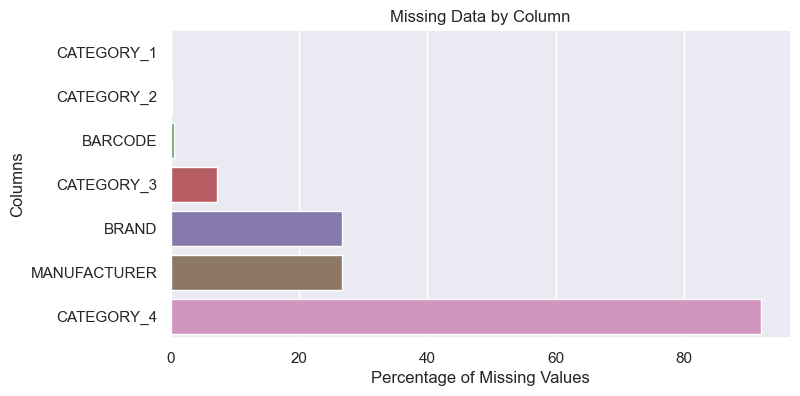

In [70]:
# Calculate the percentage of missing values for each column
missing_values = (products.isnull().sum() / len(products)) * 100

# Sort values for better visualization
missing_values = missing_values.sort_values()
print(missing_values)

# Plot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(y=missing_values.index, x=missing_values.values)

# Formatting
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Missing Data by Column")
# plt.xticks(rotation=45)

plt.show()

In [23]:
new_transactions = transactions[transactions["FINAL_QUANTITY"] != "zero"]

new_transactions["FINAL_QUANTITY"] = pd.to_numeric(new_transactions["FINAL_QUANTITY"], errors="coerce")
new_transactions["FINAL_SALE"] = pd.to_numeric(new_transactions["FINAL_SALE"], errors="coerce")

new_transactions = new_transactions.dropna(subset=["FINAL_QUANTITY"])
new_transactions = new_transactions.dropna(subset=["FINAL_SALE"])

# Drop exact duplicate rows
new_transactions = new_transactions.drop_duplicates()

# Drop duplicates based on "RECEIPT_ID", "USER_ID", "BARCODE", keeping the first occurrence
new_transactions = new_transactions.drop_duplicates(subset=["RECEIPT_ID", "USER_ID", "BARCODE"], keep="first")

/Users/alvaro/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alvaro/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
# Check for duplicate rows in transaction data
new_transaction_duplicate_rows = new_transactions.duplicated().sum()
print(f"Number of duplicate rows: {new_transaction_duplicate_rows}")

# Check for duplicate (RECEIPT_ID, USER_ID, BARCODE) in transaction data
new_transaction_duplicate_ids = new_transactions.duplicated(subset=["RECEIPT_ID", "USER_ID", "BARCODE"]).sum()
print(f"Number of duplicate IDs: {new_transaction_duplicate_ids}")

print(new_transactions.shape)

Number of duplicate rows: 0
Number of duplicate IDs: 0
(24795, 8)


In [25]:
new_transactions.sort_values(by=["RECEIPT_ID", "USER_ID", "BARCODE"]).head(10)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
41567,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,1.54
39291,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,1.0,1.49
25928,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.0,2.54
41475,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,1.0,3.49
43233,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.0,5.29
40388,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,1.0,1.46
47862,000550b2-1480-4c07-950f-ff601f242152,2024-07-06,2024-07-06 19:27:48.586 Z,WALMART,5f850bc9cf9431165f3ac175,4.920091e+10,1.0,3.12
36036,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902 Z,TARGET,6144f4f1f3ef696919f54b5c,7.830007e+10,1.0,3.59
41970,000e1d35-15e5-46c6-b6b3-33653ed3d27e,2024-08-13,2024-08-13 18:21:07.931 Z,WALMART,61a6d926f998e47aad33db66,5.200001e+10,1.0,0.98
40976,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787 Z,ALDI,66686fc2e04f743a096ea808,NaN,1.0,2.29


In [74]:
# Drop exact duplicate rows
new_products = products.drop_duplicates()

new_products = new_products.dropna(subset=["BARCODE"])

# Drop duplicates based on "BARCODE", keeping the first occurrence
new_products = new_products.drop_duplicates(subset=["BARCODE"], keep="last")

In [75]:
# Check for duplicate rows in product data
new_product_duplicate_rows = new_products.duplicated().sum()
print(f"Number of duplicate rows: {new_product_duplicate_rows}")

# Check for duplicate BARCODE in product data
new_product_duplicate_bars = new_products.duplicated(subset=['BARCODE']).sum()
print(f"Number of duplicate IDs: {new_product_duplicate_bars}")

Number of duplicate rows: 0
Number of duplicate IDs: 0


In [76]:
missing_users = new_transactions[~new_transactions["USER_ID"].isin(users["ID"])]
missing_products = new_transactions[~new_transactions["BARCODE"].isin(new_products["BARCODE"])]

print(f"Number of Transactions: {len(new_transactions)}")
print(f"Transactions with missing users: {len(missing_users)}")
print(f"Transactions with missing products: {len(missing_products)}")

Number of Transactions: 24795
Transactions with missing users: 24665
Transactions with missing products: 12440


In [77]:
# Merge transactions with users on user_id
transactions_users = new_transactions.merge(users, left_on="USER_ID", right_on="ID", how="left")

# Merge transactions with products on barcode
full_data = transactions_users.merge(new_products, on="BARCODE", how="left")

print(f"Number of Rows: {len(full_data)}")

Number of Rows: 24795


BARCODE         11.357128
CATEGORY_1      51.599113
CATEGORY_2      51.647510
BRAND           51.647510
MANUFACTURER    51.647510
CATEGORY_3      55.486993
CATEGORY_4      93.942327
STATE           99.475701
LANGUAGE        99.475701
ID              99.475701
CREATED_DATE    99.475701
GENDER          99.479734
BIRTH_DATE      99.479734
dtype: float64


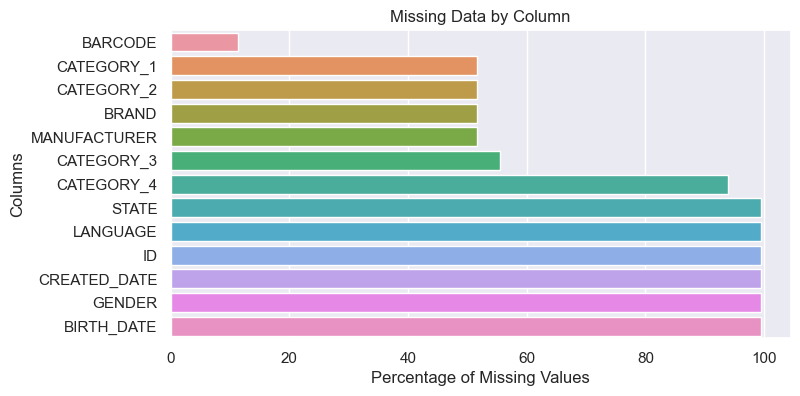

In [78]:
# Calculate the percentage of missing values for each column
missing_values = (full_data.isnull().sum() / len(full_data)) * 100

# Sort values for better visualization
missing_values = missing_values.sort_values()
missing_values = missing_values[missing_values > 0]
print(missing_values)

# Plot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(y=missing_values.index, x=missing_values.values)

# Formatting
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Missing Data by Column")
# plt.xticks(rotation=45)

plt.show()

In [94]:
full_data.sort_values(by=["BIRTH_DATE"]).head(10)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND
7308,be5a3916-5dee-45dc-b488-843a1245cfc9,2024-08-17,2024-08-17 16:02:06.547 Z,WALMART,5c6c2998b06c0045a4fddc74,7.874213e+10,1.0,2.78,5c6c2998b06c0045a4fddc74,2019-02-19 16:06:48.000 Z,1943-09-03 05:00:00.000 Z,OK,en,female,Snacks,Cookies,NaN,NaN,WALMART INC.,GREAT VALUE
17301,1545b6f9-813e-4c47-a673-fad21a219c00,2024-06-17,2024-06-17 22:07:41.785 Z,WALMART,5c6c2998b06c0045a4fddc74,2.430004e+10,1.0,2.68,5c6c2998b06c0045a4fddc74,2019-02-19 16:06:48.000 Z,1943-09-03 05:00:00.000 Z,OK,en,female,Snacks,Snack Cakes,Donut Snack Cakes,NaN,MCKEE FOODS,LITTLE DEBBIE
17125,6c757ce3-bcf4-47e2-9be9-295518246833,2024-07-11,2024-07-12 10:42:17.105 Z,DOLLAR TREE STORES INC,62c627d9b79924d29cc06f5a,9.990072e+10,1.0,1.25,62c627d9b79924d29cc06f5a,2022-07-07 00:24:57.000 Z,1944-07-20 05:00:00.000 Z,IN,en,female,Snacks,Candy,Chocolate Candy,NaN,FERRERO GROUP,BABY RUTH
22661,646ff0f9-2828-4483-ab38-fc952c3d4379,2024-08-14,2024-08-14 09:42:22.953 Z,WALMART,5f64fff6dc25c93de0383513,7.874213e+10,1.0,2.98,5f64fff6dc25c93de0383513,2020-09-18 18:44:07.000 Z,1948-09-02 04:00:00.000 Z,GA,en,male,NaN,NaN,NaN,NaN,NaN,NaN
14755,646ff0f9-2828-4483-ab38-fc952c3d4379,2024-08-14,2024-08-14 09:42:22.953 Z,WALMART,5f64fff6dc25c93de0383513,7.874201e+10,1.0,1.42,5f64fff6dc25c93de0383513,2020-09-18 18:44:07.000 Z,1948-09-02 04:00:00.000 Z,GA,en,male,NaN,NaN,NaN,NaN,NaN,NaN
1245,417a98f9-c71b-468c-b795-74c5576c0100,2024-08-14,2024-08-14 09:42:01.787 Z,WALMART,5f64fff6dc25c93de0383513,6.414405e+10,1.0,1.00,5f64fff6dc25c93de0383513,2020-09-18 18:44:07.000 Z,1948-09-02 04:00:00.000 Z,GA,en,male,NaN,NaN,NaN,NaN,NaN,NaN
489,9a6e4c08-b07b-4bad-ad44-330d2da1b67d,2024-06-17,2024-06-17 11:20:43.843 Z,WALMART,62815e99c907cf3f47d8ee35,8.100212e+11,1.0,1.97,62815e99c907cf3f47d8ee35,2022-05-15 20:12:09.000 Z,1948-10-26 05:00:00.000 Z,FL,en,female,Health & Wellness,Skin Care,Body Oil,NaN,PDC BRANDS,DR TEAL'S
10451,59df1c4c-ade1-4a77-97eb-e731bec19fed,2024-07-25,2024-07-26 19:50:38.133 Z,WALMART,664794617c0469953bf8932c,4.144900e+10,1.0,1.86,664794617c0469953bf8932c,2024-05-17 17:31:13.000 Z,1949-06-09 00:00:00.000 Z,OR,es-419,female,NaN,NaN,NaN,NaN,NaN,NaN
1161,59df1c4c-ade1-4a77-97eb-e731bec19fed,2024-07-25,2024-07-26 19:50:38.133 Z,WALMART,664794617c0469953bf8932c,3.338366e+10,1.0,1.22,664794617c0469953bf8932c,2024-05-17 17:31:13.000 Z,1949-06-09 00:00:00.000 Z,OR,es-419,female,NaN,NaN,NaN,NaN,NaN,NaN
12242,dd59569d-8e51-4f92-8b81-ed7fd0e1a411,2024-08-07,2024-08-07 17:02:08.904 Z,BJ'S WHOLESALE CLUB,62b67b8e37e6e08b0774f2c4,7.411795e+10,1.0,6.49,62b67b8e37e6e08b0774f2c4,2022-06-25 03:05:50.000 Z,1951-04-01 00:00:00.000 Z,NY,en,female,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# full_data["BIRTH_DATE"] = pd.to_datetime(full_data["BIRTH_DATE"], errors="coerce").dt.strftime("%Y-%m-%d")

# Store DataFrames as SQL tables
new_transactions.to_sql("new_transactions", conn, index=False, if_exists="replace")
new_products.to_sql("new_products", conn, index=False, if_exists="replace")
users.to_sql("users", conn, index=False, if_exists="replace")

# Run the SQL query
query = """
    SELECT p.brand, COUNT(DISTINCT t.receipt_id) AS receipt_count
    FROM new_transactions t
    LEFT JOIN new_products p ON t.BARCODE = p.BARCODE
    LEFT JOIN users u ON t.USER_ID = u.ID
    WHERE (julianday('now') - julianday(u.birth_date)) >= (21 * 365) AND p.brand IS NOT NULL 
    GROUP BY p.brand
    ORDER BY receipt_count DESC
    LIMIT 5;
"""

# Execute the query and load results into a DataFrame
top_brands = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display results
print(top_brands)

         BRAND  receipt_count
0         DOVE              3
1  NERDS CANDY              3
2    COCA-COLA              2
3  GREAT VALUE              2
4    HERSHEY'S              2


In [81]:
new_full_data = full_data.copy()
# Convert birth_date to datetime
new_full_data["BIRTH_DATE"] = pd.to_datetime(new_full_data["BIRTH_DATE"]).dt.tz_localize(None)

# Compute age in days and filter users 21+ years old
age_threshold = 21 * 365
full_data_filtered = new_full_data[
    (datetime.today() - new_full_data["BIRTH_DATE"]).dt.days >= age_threshold
]

# Exclude NULL and empty brands
full_data_filtered = full_data_filtered[full_data_filtered["BRAND"].notna() & (full_data_filtered["BRAND"] != "")]

# Count distinct receipts per brand
top_brands = (
    full_data_filtered.groupby("BRAND")["RECEIPT_ID"]
    .nunique()
    .reset_index()
    .rename(columns={"RECEIPT_ID": "receipt_count"})
    .sort_values(["receipt_count", "BRAND"], ascending=[False, True])
    .head(5)
)

print(top_brands)

          BRAND  receipt_count
13         DOVE              3
35  NERDS CANDY              3
6     COCA-COLA              2
21  GREAT VALUE              2
22    HERSHEY'S              2


In [82]:
# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# full_data["BIRTH_DATE"] = pd.to_datetime(full_data["BIRTH_DATE"], errors="coerce").dt.strftime("%Y-%m-%d")

# Store DataFrames as SQL tables
new_transactions.to_sql("new_transactions", conn, index=False, if_exists="replace")
new_products.to_sql("new_products", conn, index=False, if_exists="replace")
users.to_sql("users", conn, index=False, if_exists="replace")

# Run the SQL query
query = """
      SELECT p.brand, SUM(t.final_sale) AS total_sales
      FROM new_transactions t
      LEFT JOIN new_products p ON t.BARCODE = p.BARCODE
      LEFT JOIN users u ON t.USER_ID = u.ID
      WHERE (julianday('now') - julianday(u.created_date)) >= 182 AND p.brand IS NOT NULL 
      GROUP BY p.brand
      ORDER BY total_sales DESC
      LIMIT 5;
"""

# Execute the query and load results into a DataFrame
top_brands = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display results
print(top_brands)

         BRAND  total_sales
0          CVS        72.00
1         DOVE        30.91
2      TRIDENT        23.36
3  COORS LIGHT        17.48
4     TRESEMMÉ        14.58


In [83]:
# Convert birth_date to datetime
new_full_data["CREATED_DATE"] = pd.to_datetime(new_full_data["CREATED_DATE"]).dt.tz_localize(None)

# Compute account age in days and filter users with accounts 6+ months old
account_age_threshold = 182  # 6 months in days
full_data_filtered = new_full_data[
    (datetime.today() - new_full_data["CREATED_DATE"]).dt.days >= account_age_threshold
]

# Exclude NULL and empty brands
full_data_filtered = full_data_filtered[full_data_filtered["BRAND"].notna() & (full_data_filtered["BRAND"] != "")]

# Sum sales per brand
top_sales_brands = (
    full_data_filtered.groupby("BRAND")["FINAL_SALE"]
    .sum()
    .reset_index()
    .rename(columns={"FINAL_SALE": "total_sales"})
    .sort_values("total_sales", ascending=False)
    .head(5)
)

print(top_sales_brands)


          BRAND  total_sales
9           CVS        72.00
13         DOVE        30.91
56      TRIDENT        23.36
7   COORS LIGHT        17.48
55     TRESEMMÉ        14.58


In [84]:
# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# full_data["BIRTH_DATE"] = pd.to_datetime(full_data["BIRTH_DATE"], errors="coerce").dt.strftime("%Y-%m-%d")

# Store DataFrames as SQL tables
new_transactions.to_sql("new_transactions", conn, index=False, if_exists="replace")
# new_products.to_sql("new_products", conn, index=False, if_exists="replace")
# users.to_sql("users", conn, index=False, if_exists="replace")

# Run the SQL query
query = """
    SELECT t.USER_ID, SUM(t.FINAL_SALE) AS total_sales
    FROM new_transactions t
    GROUP BY t.USER_ID
    ORDER BY total_sales DESC
    LIMIT 5;
"""

# Execute the query and load results into a DataFrame
top_users = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display results
print(top_users)

                    USER_ID  total_sales
0  630789e1101ae272a4852287       462.82
1  650874eafe41d365c2ee11d2       267.29
2  63af23db9f3fc9c7546fdbec       238.17
3  645add3bffe0d7e043ef1b63       227.93
4  6535138fdda97e6b1342ea7f       146.65


In [85]:
# Compute total sales per user and sort in descending order
top_users_by_sales = (
    full_data.groupby("USER_ID")["FINAL_SALE"]
    .sum()
    .reset_index()
    .rename(columns={"FINAL_SALE": "total_sales"})
    .sort_values("total_sales", ascending=False)
    .head(5)  # Adjust the number to get top N users
)

print(top_users_by_sales)

                        USER_ID  total_sales
10392  630789e1101ae272a4852287       462.82
14830  650874eafe41d365c2ee11d2       267.29
12195  63af23db9f3fc9c7546fdbec       238.17
13636  645add3bffe0d7e043ef1b63       227.93
15101  6535138fdda97e6b1342ea7f       146.65


In [86]:
# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# full_data["BIRTH_DATE"] = pd.to_datetime(full_data["BIRTH_DATE"], errors="coerce").dt.strftime("%Y-%m-%d")

# Store DataFrames as SQL tables
new_transactions.to_sql("new_transactions", conn, index=False, if_exists="replace")
new_products.to_sql("new_products", conn, index=False, if_exists="replace")
# users.to_sql("users", conn, index=False, if_exists="replace")

# Run the SQL query
query = """
    SELECT p.BRAND, SUM(t.FINAL_SALE) AS total_sales
    FROM new_transactions t
    LEFT JOIN new_products p ON t.BARCODE = p.BARCODE
    WHERE p.category_2 = 'Dips & Salsa'
    GROUP BY p.BRAND
    ORDER BY total_sales DESC
    LIMIT 1;
"""

# Execute the query and load results into a DataFrame
top_brand = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display results
print(top_brand)

      BRAND  total_sales
0  TOSTITOS        181.3


In [87]:
# Filter data for 'Dips & Salsa' category
dips_salsa_data = full_data[full_data["CATEGORY_2"] == "Dips & Salsa"]

# Group by BRAND and sum FINAL_SALE
top_brand = (
    dips_salsa_data.groupby("BRAND")["FINAL_SALE"]
    .sum()
    .reset_index()
    .rename(columns={"FINAL_SALE": "total_sales"})
    .sort_values("total_sales", ascending=False)
    .head(1)
)

print(top_brand)

       BRAND  total_sales
53  TOSTITOS        181.3
